<a href="https://colab.research.google.com/github/portiamcd1/AIDatagen/blob/DatagenOne/DissV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Dependencies**

In [ ]:
!pip3 install datasets
!pip3 install kagglehub
!pip3 install tensorflow
!pip3 uninstall gcsfs==2024.10.0 -y
!pip3 install gcsfs==2024.09.0.post1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Found existing installation: gcsfs 2024.10.0
Uninstalling gcsfs-2024.10.0:
  Successfully uninstalled gcsfs-2024.10.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
# from collections import Counter
# import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
# import io
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tqdm.notebook import tqdm # To add a nice visual of the loading bars.
import random
import numpy as np
import keras
from keras import regularizers
# import torch
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms



**Setting up Kaggle API & Token**

In [ ]:
import os
import datasets
from google.colab import files
from datasets import load_dataset
from google.colab import drive
drive.mount('/content/drive/')

ds = load_dataset("sj21867/ai_art")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Remove old data
def remove_old_data(dir_name):
    list_of_files = os.listdir(dir_name)
    for the_file in list_of_files:
        if the_file.endswith(".png"):
            os.remove(os.path.join(dir_name, the_file))

output_dir_human = '/content/drive/MyDrive/data_uni_2/human'
output_dir_ai = '/content/drive/MyDrive/data_uni_2/ai'

if os.path.exists('/content/drive/MyDrive/data_uni_2'):
    remove_old_data(output_dir_human)
    remove_old_data(output_dir_ai)


In [ ]:
# Data as provided has two folders labeled as training and test
# Need to split data into two folders labeled human and ai
# So that Keras can import data correctly.

def save_images(img, output_dir, filename):
    try:
        full_file_name = os.path.join(output_dir, filename)
        img = img.convert('RGB')  # RGB conversion if needed
        img.save(full_file_name, 'PNG')  # All images saved as PNG
        print(f"Saved: {full_file_name}")
        return full_file_name
    except Exception as e:
        print(f"Exception couldn't save {filename}: {e}")
        return None

if not os.path.exists('/content/drive/MyDrive/data_uni_2'):
    os.makedirs('/content/drive/MyDrive/data_uni_2')
    os.makedirs(output_dir_human)
    os.makedirs(output_dir_ai)


count = 0
# Process each row in the dataset for each data type (train & test)
for data_type in ['train', 'test']:
  for index, rec in enumerate(ds[data_type]):  # 'train' images
      # Get data from item - contains 'image' and 'label'
      rec_image =rec['image']
      rec_label = rec['label']

      # Check if image_data is an actual image (not byte data)
      if isinstance(rec_image, Image.Image):
          filename = f'image_{str(count)}.png'  # create filename
          count += 1
          # print(f"Processing row {i}, Type of image data: {type(rec_image)}")
          # Split data in human and ai images then pass correct folder name
          # Classified as 1 for human and 0 for ai
          if 'human' in rec_label:
              # the_classification = 1 HUMAN
              saved_path = save_images(rec_image, output_dir_human, filename)
          else:
              # the_classification = 0 AI
              saved_path = save_images(rec_image, output_dir_ai, filename)


Streaming output truncated to the last 5000 lines.
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4000.png
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4001.png
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4002.png
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4003.png
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4004.png
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4005.png
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4006.png
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4007.png
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4008.png
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4009.png
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4010.png
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4011.png
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4012.png
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4013.png
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4014.png
Saved: /content/drive/MyDrive/data_uni_2/ai/image_4015.png
Saved

In [ ]:
# # Training csv - classifying human to 1 and AI to 0.
# training_csv = '/content/drive/MyDrive/data_uni/train.csv'
# with open(training_csv, 'w') as o:
#     o.write('image_path,label,classification\n')
#     for i in range(len(image_paths)):
#         if 'human' in labels[i]:
#             o.write(f'{image_paths[i]},{labels[i]},{1}\n')
#         else:
#             o.write(f'{image_paths[i]},{labels[i]},{0}\n')

In [ ]:
# Create test data
# Data as provided has two folders labeled as training and test
# Need to split data into two folders labeled human and ai
# So that Keras can import data correctly.

# def save_images(img, output_dir, filename):
#     try:
#         full_file_name = os.path.join(output_dir, filename)
#         img = img.convert('RGB')  # RGB conversion if needed
#         img.save(full_file_name, 'PNG')  # All images saved as PNG
#         print(f"Saved: {full_file_name}")
#         return full_file_name
#     except Exception as e:
#         print(f"Exception couldn't save {filename}: {e}")
#         return None



# output_dir_human = '/content/drive/MyDrive/data_uni_2/human'
# output_dir_ai = '/content/drive/MyDrive/data_uni_2/ai'
# List to store image file paths, labels, and classifications
# image_paths = []
# labels = []
# classifications = []  # Add a default classification value

# # Process each row in the dataset
# for index, rec in enumerate(ds['test']):  # 'train' images
#     # Get data from item - contains 'image' and 'label'
#     rec_image =rec['image']
#     rec_label = rec['label']

#     # print(f"Processing row {i}, Type of image data: {type(rec_image)}")

#     # Check if image_data is an actual image (not byte data)
#     if isinstance(rec_image, Image.Image):
#         filename = f'image_{index}.png'  # create filename
#         # Split data in human and ai images then pass correct folder name
#         # Classified as 1 for human and 0 for ai
#         if 'human' in rec_label:
#             # the_classification = 1 HUMAN
#             saved_path = save_images(rec_image, output_dir_human, filename)
#         else:
#             # the_classification = 0 AI
#             saved_path = save_images(rec_image, output_dir_ai, filename)
#         # Save the image

#     #     if saved_path:
#     #         image_paths.append(saved_path)  # Store the saved image path
#     #         labels.append(label)            # Store the label
#     #         classifications.append(the_classification) # Assign classification 0 (or any default value)
#     #     else:
#     #         image_paths.append(None)  # In case of failure, append None
#     #         labels.append(None)       # If no image saved, append None to label
#     #         classifications.append(None)  # Append None for classification in case of failure
#     # else:
#     #     print(f"Skipping row {i}: Image data is not of type PIL.Image")
#     #     image_paths.append(None)
#     #     labels.append(None)
#     #     classifications.append(None)

Processing row 0, Type of image data: <class 'PIL.PngImagePlugin.PngImageFile'>
Image saved: /content/drive/MyDrive/data_uni_2/human/image_0.png
Processing row 1, Type of image data: <class 'PIL.PngImagePlugin.PngImageFile'>
Image saved: /content/drive/MyDrive/data_uni_2/human/image_1.png
Processing row 2, Type of image data: <class 'PIL.PngImagePlugin.PngImageFile'>
Image saved: /content/drive/MyDrive/data_uni_2/human/image_2.png
Processing row 3, Type of image data: <class 'PIL.PngImagePlugin.PngImageFile'>
Image saved: /content/drive/MyDrive/data_uni_2/human/image_3.png
Processing row 4, Type of image data: <class 'PIL.PngImagePlugin.PngImageFile'>
Image saved: /content/drive/MyDrive/data_uni_2/human/image_4.png
Processing row 5, Type of image data: <class 'PIL.PngImagePlugin.PngImageFile'>
Image saved: /content/drive/MyDrive/data_uni_2/human/image_5.png
Processing row 6, Type of image data: <class 'PIL.PngImagePlugin.PngImageFile'>
Image saved: /content/drive/MyDrive/data_uni_2/hum

In [ ]:
# # Test csv - classifying human to 1 and AI to 0.
# test_csv = '/content/drive/MyDrive/data_uni_2/test.csv'
# with open(test_csv, 'w') as o:
#     o.write('image_path,label,classification\n')
#     for i in range(len(image_paths)):
#         if 'human' in labels[i]:
#             o.write(f'{image_paths[i]},{labels[i]},{1}\n')
#         else:
#             o.write(f'{image_paths[i]},{labels[i]},{0}\n')

In [ ]:
# normalising training data

# normalised_training = training_csv
# with open(training_csv, 'r') as f:
#     f.readline()
#     for line in tqdm(f):
#       tl = line.replace('\n', '').split(",")
#       tl[-1] = int(tl[-1])
#       print(tl)

# data_dir = '/content/drive/MyDrive/data_uni/training'

# data_transforms = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=mean, std=std)
# ])

# dataset = datasets.ImageFolder(data_dir, transform=data_transforms)


0it [00:00, ?it/s]

Streaming output truncated to the last 5000 lines.
['/content/drive/MyDrive/data_uni/train/image_2500.png', 'SD_impressionism', 0]
['/content/drive/MyDrive/data_uni/train/image_2501.png', 'SD_impressionism', 0]
['/content/drive/MyDrive/data_uni/train/image_2502.png', 'SD_impressionism', 0]
['/content/drive/MyDrive/data_uni/train/image_2503.png', 'SD_impressionism', 0]
['/content/drive/MyDrive/data_uni/train/image_2504.png', 'SD_impressionism', 0]
['/content/drive/MyDrive/data_uni/train/image_2505.png', 'SD_impressionism', 0]
['/content/drive/MyDrive/data_uni/train/image_2506.png', 'SD_impressionism', 0]
['/content/drive/MyDrive/data_uni/train/image_2507.png', 'SD_impressionism', 0]
['/content/drive/MyDrive/data_uni/train/image_2508.png', 'SD_impressionism', 0]
['/content/drive/MyDrive/data_uni/train/image_2509.png', 'SD_impressionism', 0]
['/content/drive/MyDrive/data_uni/train/image_2510.png', 'SD_impressionism', 0]
['/content/drive/MyDrive/data_uni/train/image_2511.png', 'SD_impressi

In [ ]:
image_size = (256, 256)
batch_size = 128

data_to_train, data_to_test = keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/data_uni_2",
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="both",
    seed=66,
    image_size=image_size,
    batch_size=batch_size,
)



Found 9000 files belonging to 2 classes.
Using 7200 files for training.
Using 1800 files for validation.


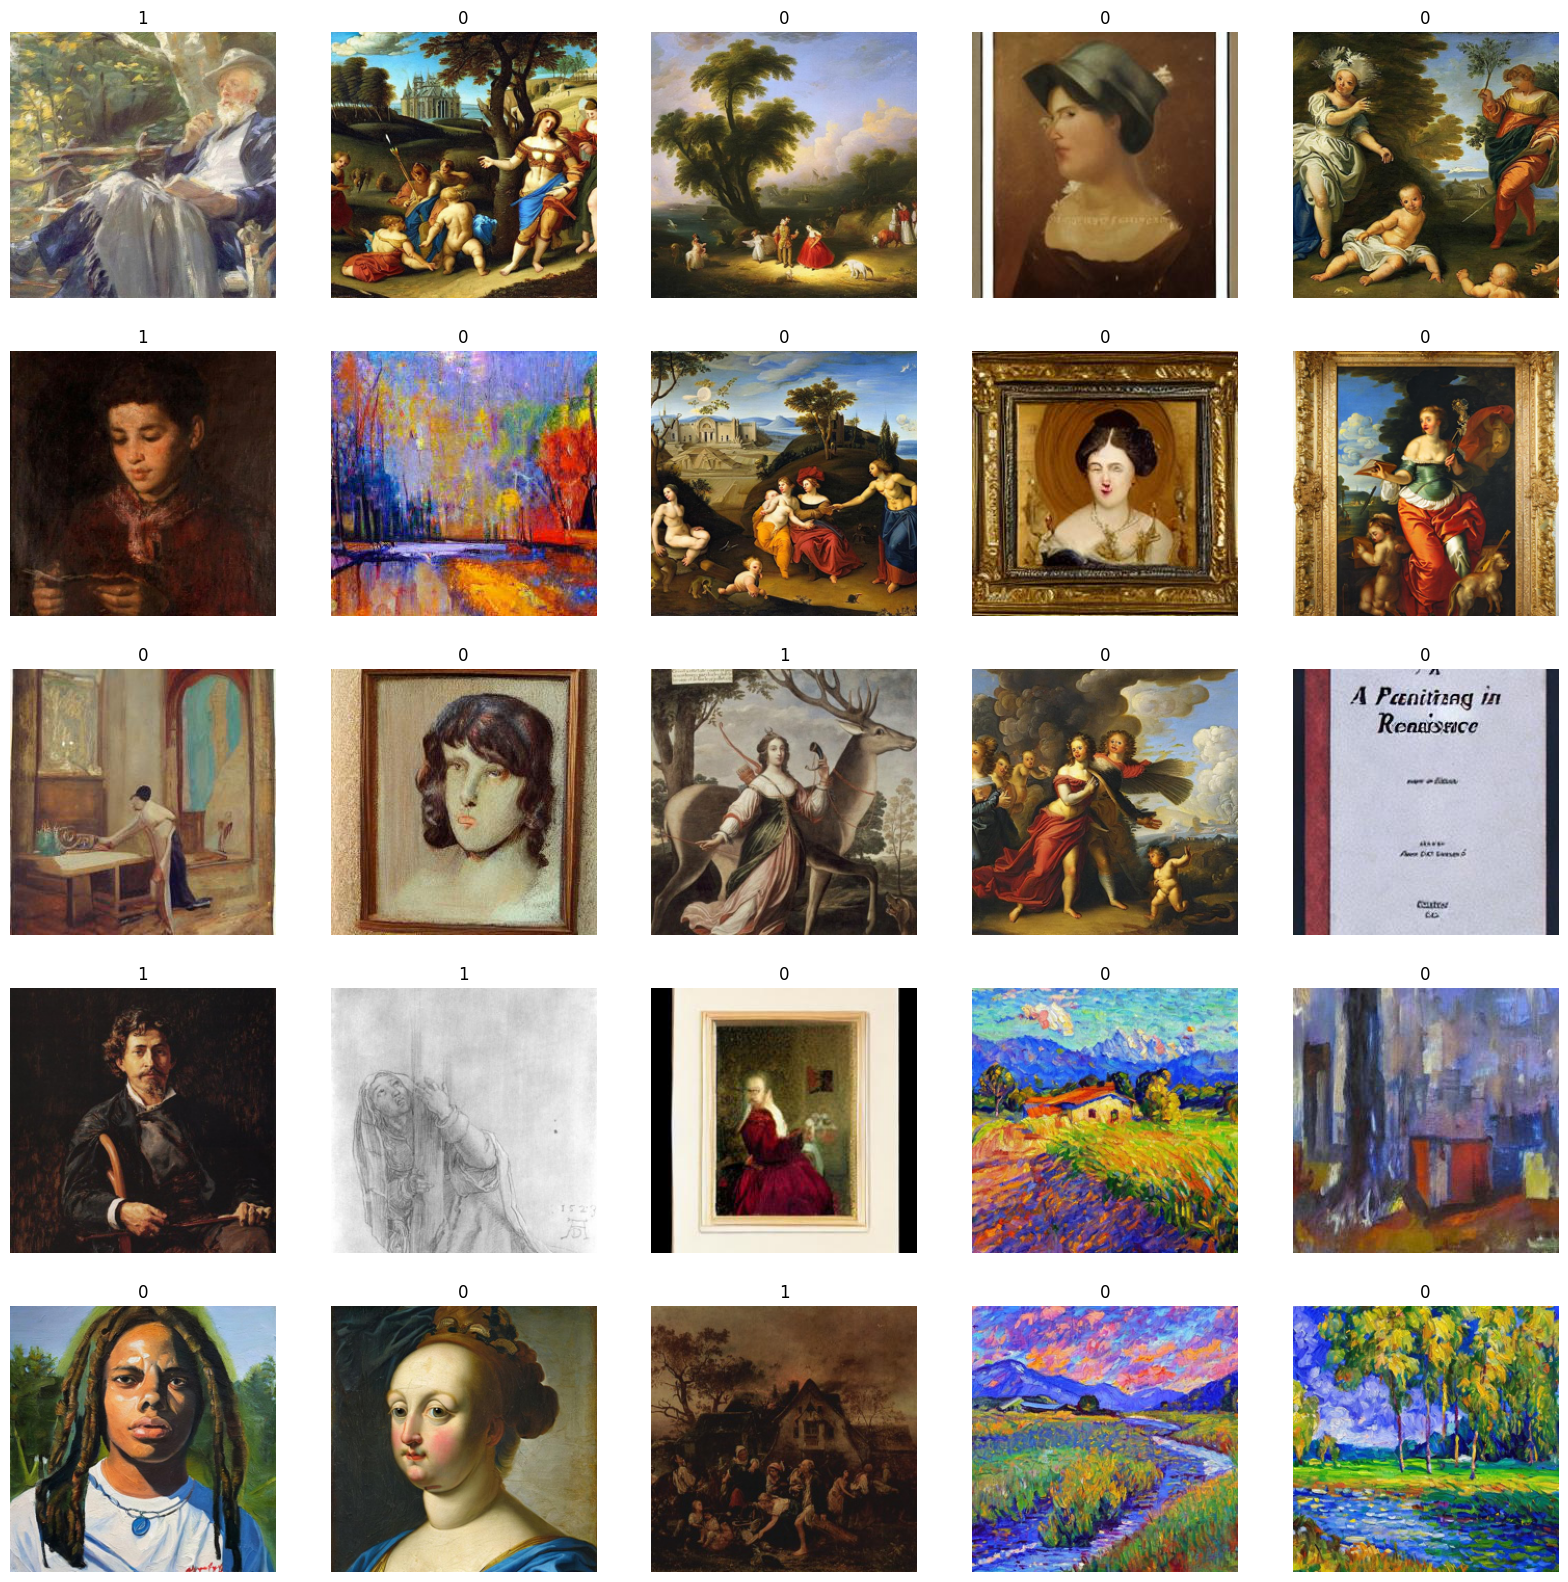

In [ ]:
# Sanity check on images with categories 1 - Human 0 - AI
plt.figure(figsize=(20, 20))
for images, labels in data_to_train.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
from keras import layers

data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(factor=(-0.1, 0.1)),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    # images = layers.RandomFlip("horizontal")
    # images = layers.RandomRotation(factor=(-0.1, 0.1))
    return images

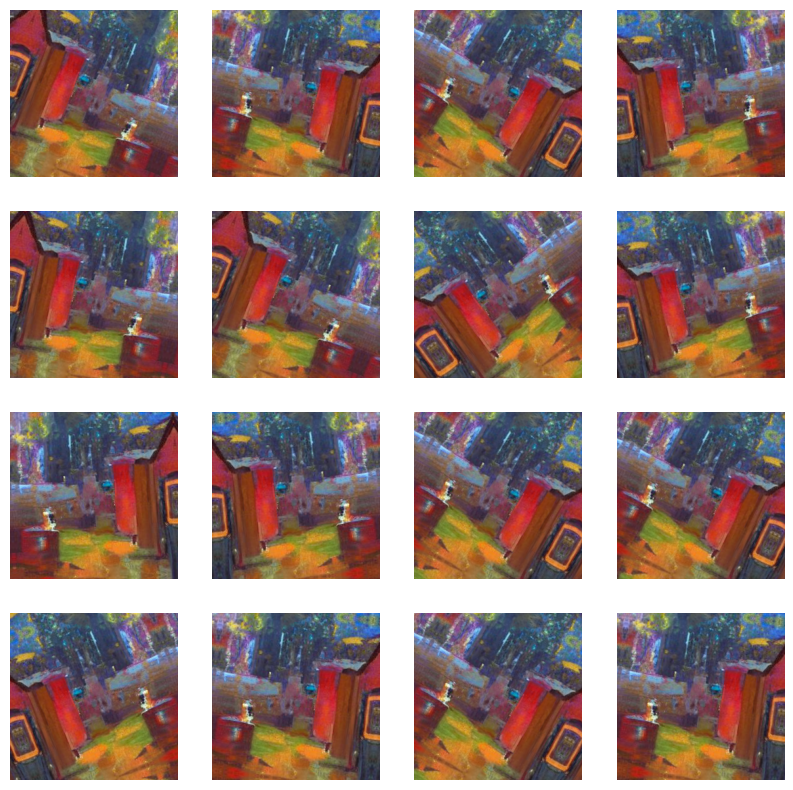

In [ ]:
# Sanity check on data augmentation
plt.figure(figsize=(10, 10))
for images, _ in data_to_train.take(1):
    for i in range(16):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [ ]:
from tensorflow import data as tf_data

data_to_train = data_to_train.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Increase GPU usage.
data_to_train = data_to_train.prefetch(tf_data.AUTOTUNE)
data_to_test = data_to_test.prefetch(tf_data.AUTOTUNE)

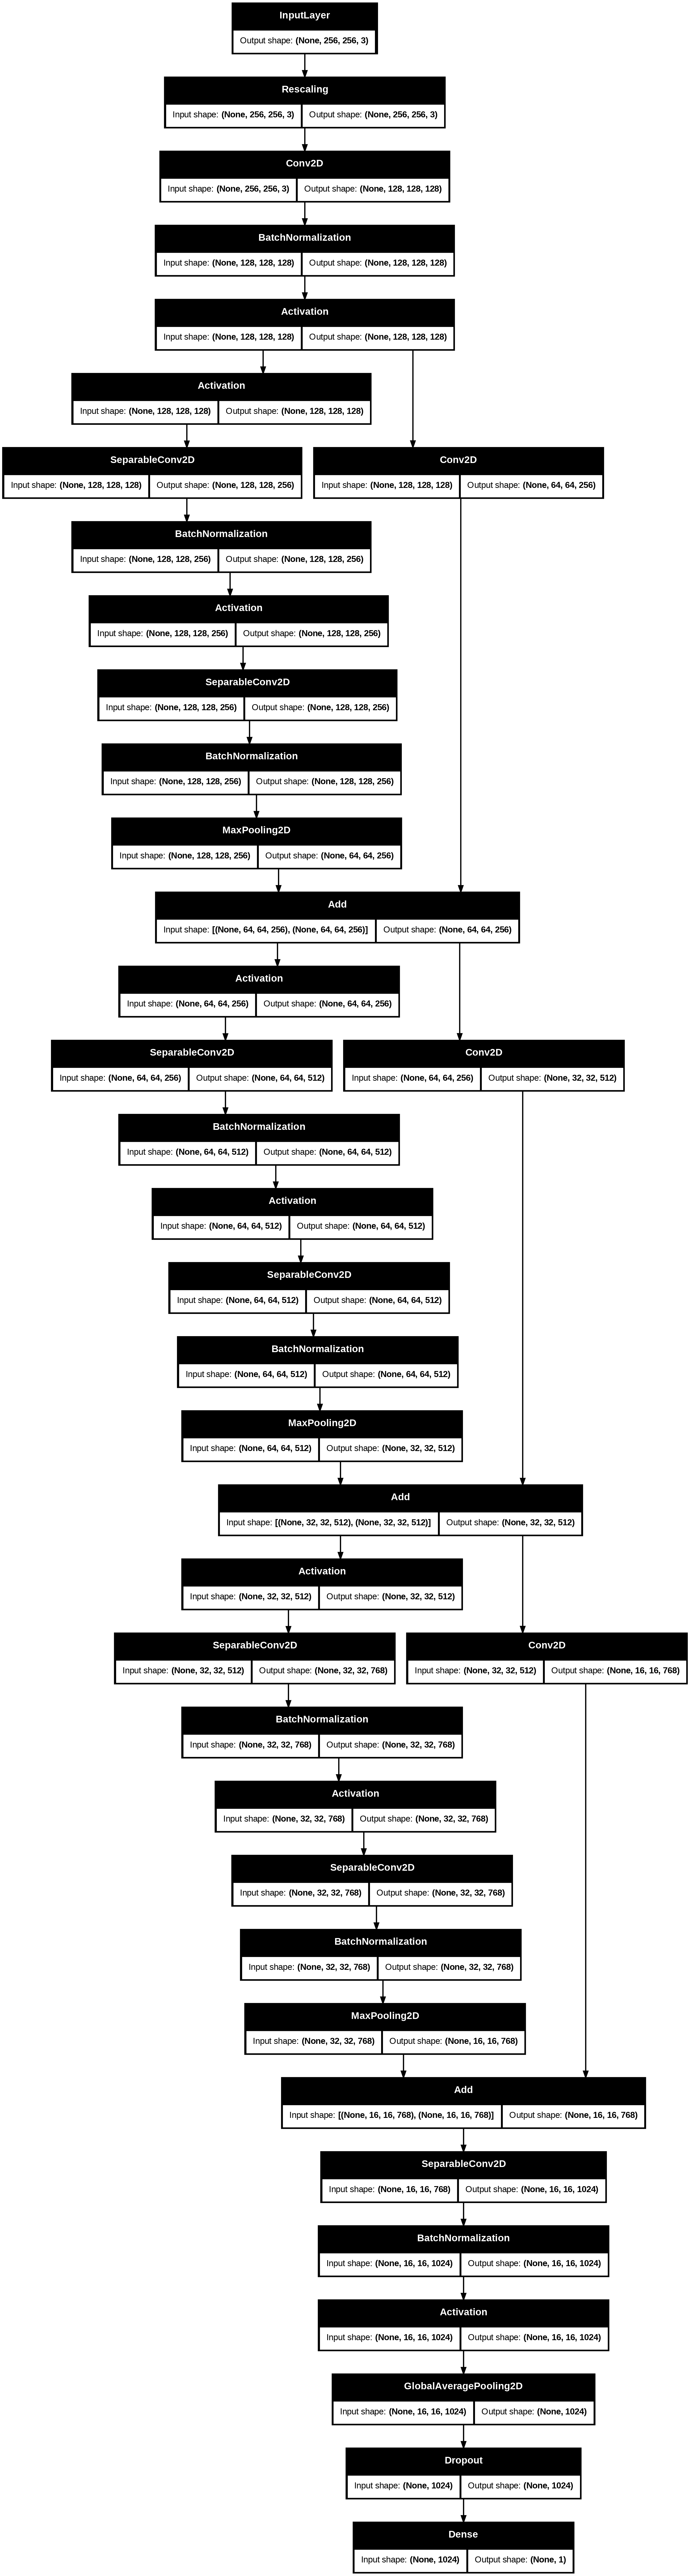

In [ ]:
# Build the model
def make_model(input_shape, num_classes):

    inputs = keras.Input(shape=input_shape)

    # Apply augumentation
    # x = data_augmentation(inputs)
    # x = layers.Rescaling(1./255)(x)

    # start prep
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(keras.activations.relu)(x)

    previous_block_activation = x

    for size in [256, 512, 768]:
        x = layers.Activation(keras.activations.relu)(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation(keras.activations.relu)(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])
        previous_block_activation = x

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(keras.activations.relu)(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        units = 1
    else:
        units = num_classes

    x = layers.Dropout(0.25)(x)

    outputs = layers.Dense(units, activation=None)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Train model
epochs = 30


checkpoint_filepath = '/content/drive/MyDrive/checkpoint.model.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

model.compile(optimizer=keras.optimizers.Adam(3e-4),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy(name="acc")],)

history = model.fit(data_to_train,
                    epochs=epochs,
                    callbacks=model_checkpoint_callback,
                    validation_data=data_to_test,)

Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 119s 713ms/step - acc: 0.7944 - loss: 0.4604 - val_acc: 0.6728 - val_loss: 0.6908
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 323ms/step - acc: 0.8885 - loss: 0.2799 - val_acc: 0.6728 - val_loss: 0.7071
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 324ms/step - acc: 0.8977 - loss: 0.2489 - val_acc: 0.6728 - val_loss: 0.7416
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step - acc: 0.9183 - loss: 0.2091 - val_acc: 0.3411 - val_loss: 0.8134
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms/step - acc: 0.9248 - loss: 0.1865 - val_acc: 0.3272 - val_loss: 0.9811
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 328ms/step - acc: 0.9381 - loss: 0.1639 - val_acc: 0.3272 - val_loss: 1.2129
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - acc: 0.9456 - loss: 0.1367 - val_acc: 0.3272 - val_loss: 1.5318
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 325ms/step - acc: 0.9479 - loss: 0.1371 - val_acc: 0.3272 - val_loss: 1.7097
Epoch 9/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
This image is 100.00% AI and 0.00% Human.


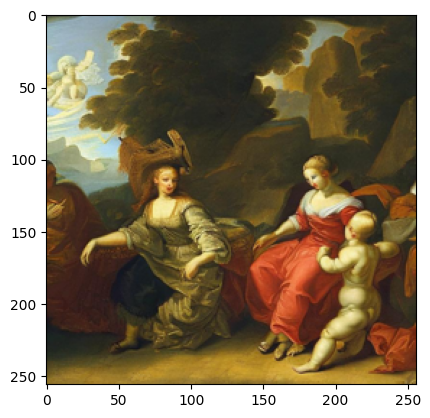

In [ ]:
# Run a test
img = keras.utils.load_img("/content/drive/MyDrive/data_uni_2/ai/image_1072.png", target_size=image_size)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - score):.2f}% AI and {100 * score:.2f}% Human.")


**Splitting Data for Train, Val & Test**

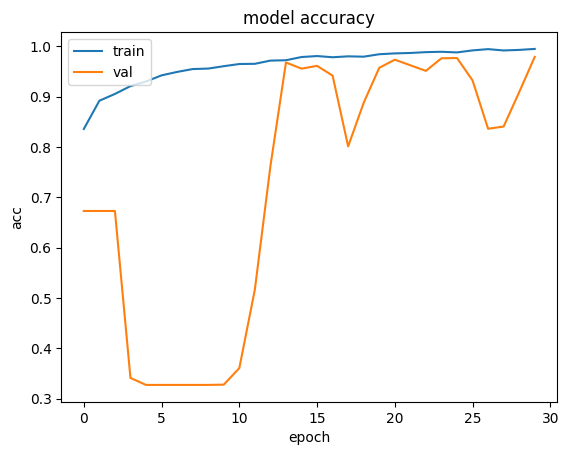

In [ ]:
# Plot model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
#  Plot model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


NameError: name 'plt' is not defined

F1 Score

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/checkpoint.model.keras')

correct_y= []
Ypredict= []

for img, label in data_to_test:
  preds = model.predict(img)
  binary_preds = (preds >= 0).astype(int)
  correct_y.extend(label.numpy())
  Ypredict.extend(binary_preds)


f1 = f1_score(y_true, Y_pred)
print(f1)